In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile

# Extract dataset
data_path = 'C://Users//ashad//Downloads//archive (4).zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted')

# Set the path to the dataset
path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)

The data set has been extracted


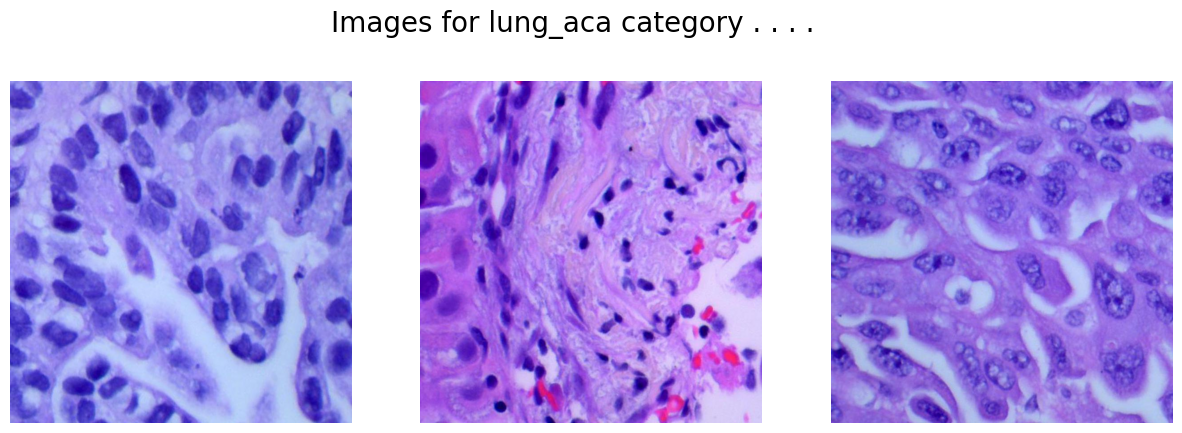

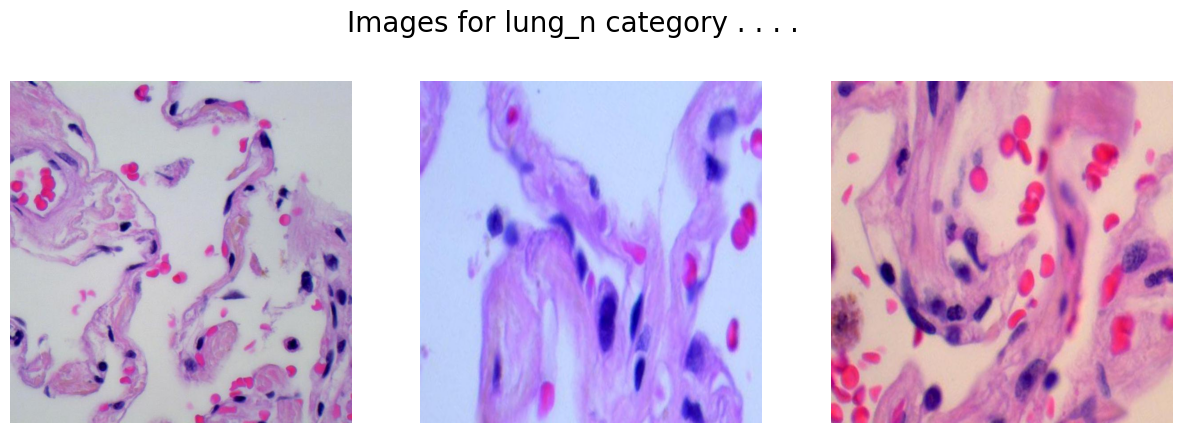

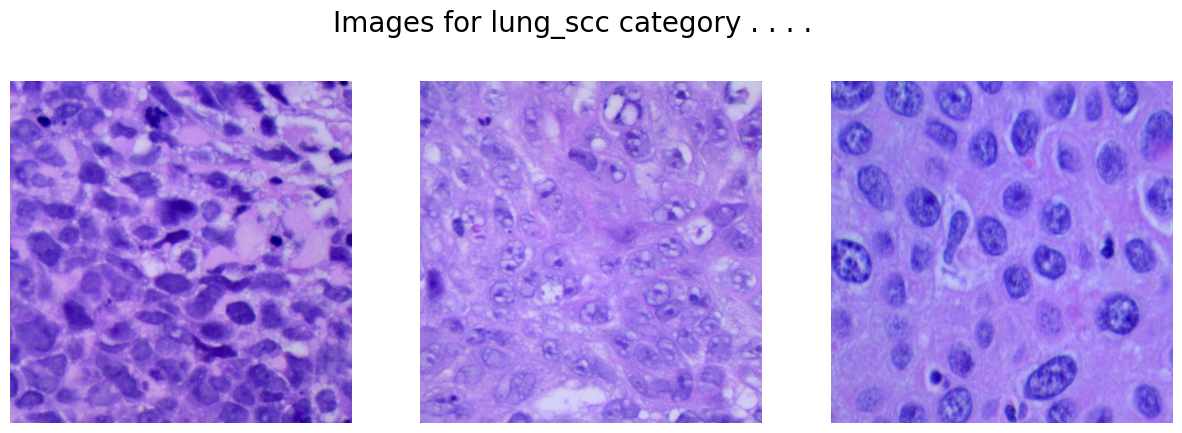

In [2]:
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [11]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS =4
BATCH_SIZE = 64

# Loading and preprocessing the dataset
X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')

    for image in images:
        img = cv2.imread(image)
        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

In [12]:
# Splitting the dataset into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, one_hot_encoded_Y, test_size=0.2, random_state=2022)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=2022)

In [13]:
# Print the shapes of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (12000, 256, 256, 3)
Validation set shape: (1500, 256, 256, 3)
Test set shape: (1500, 256, 256, 3)


In [14]:
from keras.applications.vgg16 import VGG16

In [15]:
pip install pydot graphviz

In [17]:
# # Callbacks for early stopping and learning rate reduction
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if logs.get('val_accuracy') > 0.90:
#             print('\nValidation accuracy has reached 90%, stopping further training.')
#             self.model.stop_training = True

# es = keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
# lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# # Training the model
# history = model.fit(X_train, Y_train,
#                     validation_data=(X_val, Y_val),
#                     batch_size=BATCH_SIZE,
#                     epochs=EPOCHS,
#                     verbose=1,
#                     callbacks=[es, lr, myCallback()])
# Callbacks for early stopping and learning rate reduction
es = keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# Training the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[es, lr])


Epoch 1/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 3678s 19s/step - accuracy: 0.9191 - loss: 0.2136 - val_accuracy: 0.9753 - val_loss: 0.0597 - learning_rate: 0.0010
Epoch 2/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 3579s 19s/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9807 - val_loss: 0.0648 - learning_rate: 0.0010
Epoch 3/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.9983 - loss: 0.0084 
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 3130s 17s/step - accuracy: 0.9983 - loss: 0.0084 - val_accuracy: 0.9827 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 4/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 3201s 17s/step - accuracy: 0.9986 - loss: 0.0068 - val_accuracy: 0.9840 - val_loss: 0.0640 - learning_rate: 5.0000e-04


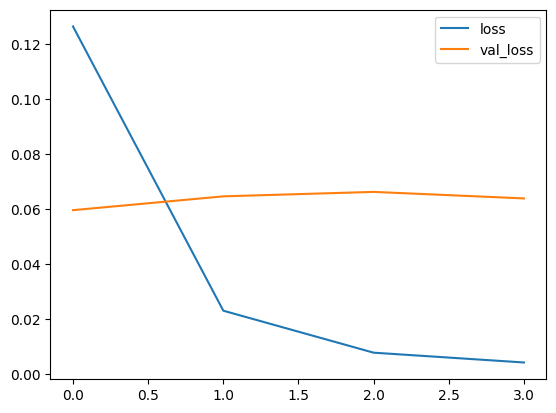

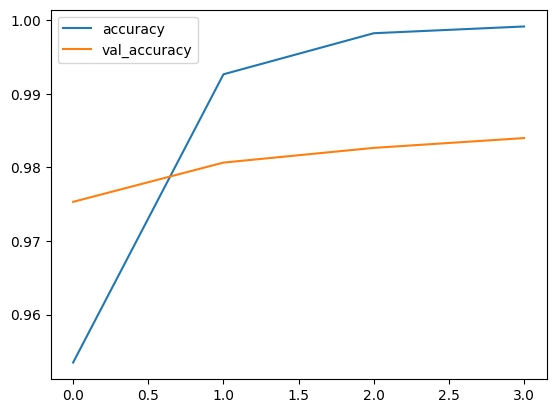

In [18]:
# Plotting training history
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [19]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Test accuracy: 98.60%


In [20]:
# Generating classification report
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

report = metrics.classification_report(Y_true_classes, Y_pred_classes, target_names=classes)
print(report)

47/47 ━━━━━━━━━━━━━━━━━━━━ 342s 7s/step
              precision    recall  f1-score   support

    lung_aca       0.98      0.97      0.98       471
      lung_n       1.00      1.00      1.00       510
    lung_scc       0.98      0.99      0.98       519

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [24]:
model.save('lung_cancer_resnet_model.h5')